In [260]:
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
import pandas as pd
import matplotlib as plt
import os

In [261]:
os.chdir("/home/matvey/data/LshCas13a_RNA_cleavage/LshCas13a_in_vitro_total_RNA/")

In [262]:
LRTTableFile = "Results/Tables/TCS_detection_tables/LRTest_table_and_genome_features.tsv"
EcoliChrFile = "Reference_sequences/NC_000913.3.fasta"
RNAFragmentsOutputFile = "hairpin_cleavage/Data/top_10_ORFs_cleaved_RNA_fragments.fasta"

In [263]:
LRTTable = pd.read_csv(LRTTableFile, sep="\t")
LRTTable.sort_values(by="PValue.adj", ascending=True, inplace=True, ignore_index=True)
EcoliChrSeq = SeqIO.read(EcoliChrFile, "fasta").seq.transcribe()

In [264]:
def extract_adj_seqs(seq, pos, strand, width):
    assert (strand in ["+", "-"]), "Invalid strand value"
    #should be 0-based coordinates
    if strand == "+":
        seq_slice = seq[pos-width : pos+width]
    elif strand == "-":
        seq_slice = seq[pos-width+1 : pos+width+1].reverse_complement()
    return(seq_slice)

In [265]:
Width = 50
SubSeqsList = list()

for i, row in LRTTable[LRTTable["MatchedFeatureType"] == "CDS"].head(10).iterrows():
    record_id = f'{row["MatchedFeatureGene"]}-{row["Pos"]}-({row["Strand"]})'
    record_seq = extract_adj_seqs(seq=EcoliChrSeq,
                                  pos=row["Pos"]-1,
                                  strand=row["Strand"],
                                  width=Width)
    
    SubSeqsList.append(SeqRecord(id=record_id,
                                 name=record_id,
                                 description=f'{row["MatchedFeatureDescription"]} fragment', 
                                 seq=record_seq))

In [266]:
with open(RNAFragmentsOutputFile, "w") as hOutput:
    SeqIO.write(sequences=SubSeqsList, handle=hOutput, format="fasta")

In [288]:
from subprocess import Popen, PIPE
import forgi, re
import matplotlib.pyplot as plt
from fvm_plot_rna_addcolors import plot_rna_addcolors

In [289]:
DotBracketNotationFile = "hairpin_cleavage/Data/top_10_ORFs_cleaved_RNA_fragments.dbn"

In [290]:
energy_pattern = r"\((.\d+.+)\)"
with open(DotBracketNotationFile, "w") as hDotBracketNotationFile:
    RNAfoldProc = Popen(["RNAfold", "--noPS", RNAFragmentsOutputFile], stdout=PIPE)
    
    for line in RNAfoldProc.stdout:
        hDotBracketNotationFile.write(re.sub(energy_pattern, "", line.decode("ascii")))

In [291]:
ForgiSSRecords = forgi.load_rna(filename=DotBracketNotationFile, allow_many=True)

NameError: name 'log' is not defined

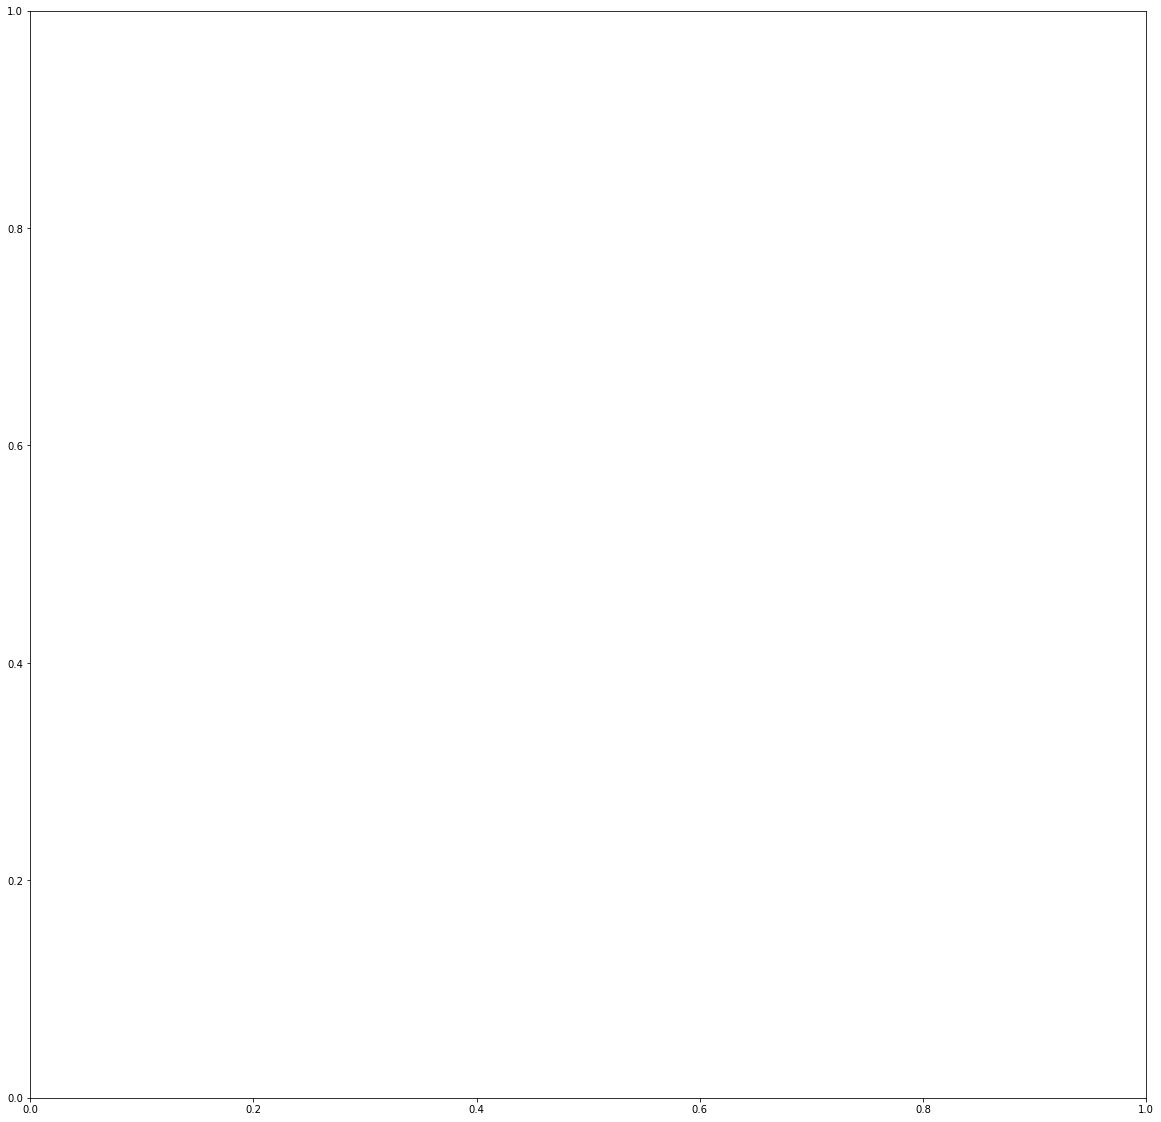

In [292]:
figure, ax = plt.subplots(figsize=(20, 20))
plot_rna_addcolors(ForgiSSRecords[0], 
             ax=ax,
             color=False,
             text_kwargs={"fontweight":"black"}, 
             lighten=0.7,
             backbone_kwargs={"linewidth":1})

In [286]:
??fvm.plot_rna